# PROYEK AKHIR PRAKTIKUM KECERDASAN BUATAN
# KELOMPOK 6

## Anggota Kelompok :
    Dimas Abdi Yudha (2109106005)
    Alfi Nor Ihsan (2109106018)
    Dimas Arya Nugraha (2109106019)

## Metadata :
Dataset yang di gunakan pada proyek kecerdasan buatan yang kami gunakan berasal dari dataset :
[Fruit Quality Classification](https://www.kaggle.com/datasets/ryandpark/fruit-quality-classification)

Dataset diatas mencakup data dalam bentuk gambar dan memuat data berupa 3 macam kelas kualiatas (buruk, baik, dan campuran) serta 6 macam kelas buah (Apel, pisang, jambu, jeruk nipis dan delima).
Namun untuk menyesuaikan data dengan tujuan yang ingin kami capai, kami memutuskan hanya mengambil data buah **Jeruk Nipis** yang mencakup dua macam kelas kualitas, yaitu baik dan buruk.

Adapun rincian dataset:
- Total gambar : 2.174 gambar 
- Kelas Kualitas : 2 (Baik dan Buruk) 
- ukuran gambar : 256 x 256 pixel
- Pengambilan Gambar : Arah depan, atas, belakang, bawah dan di putar 180 derajat

# DAFTAR ISI

1. [IMPORT LIBRARY YANG DI GUNAKAN](#IMPORTS)
2. [VISUALISASI DATASET](#VISUALISASI)
3. [AUGMENTASI](#AUGMENTASI)
4. [PREPROCESSING](#PREPROCESSING)
5. [VISUALISASI DATA SETELAH PREPROCESSING](#VISUALISASI2)
6. [MODELLING](#MODELLING)
7. [MENYIMPAN MODEL](#SAVE)
8. [EVALUASI](#EVALUASI)
9. [VISUALISASI AKURASI DAN LOSS](#AKURASI)
10. [LOAD MODEL DAN PREDIKSI](#PREDIKSI)



## IMPORT LIBRARY YANG DI GUNAKAN <a name="IMPORTS">

In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.image as mpimg
from keras.preprocessing import image
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

In [24]:
class_names = ['Lime_Bad', 'Lime_Good']

#

## VISUALISASI DATASET <a name="VISUALISASI">

### EDA 

In [118]:
Lime_Good = 0
Lime_Bad = 0

array =  [ 
          'D:/venv_A1-21/PA_KB/Lime/Lime_Good', 
          'D:/venv_A1-21/PA_KB/Lime/Lime_Bad', 
          ]

for path in os.scandir(array[0]):
  if path.is_file():
    Lime_Good += 1
for path in os.scandir(array[1]):
  if path.is_file():
    Lime_Bad += 1

print('file count Good Lime :', Lime_Good)
print('file count Bad Lime :', Lime_Bad)

lime = ['Lime_Good', 'Lime_Bad']
count = [Lime_Good, Lime_Bad]

file count Good Lime : 1094
file count Bad Lime : 1085


#

### Perbandingan data Buah Jeruk nipis yang bagus dan buruk dengan diagram batang

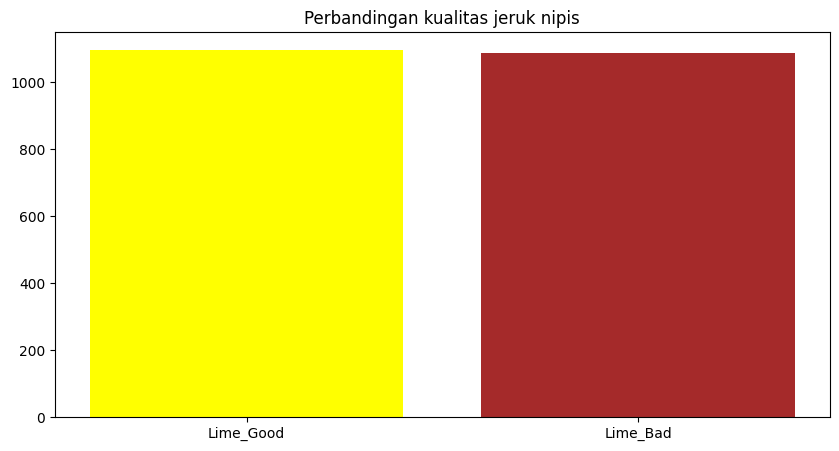

In [61]:
import matplotlib.pyplot as plt
x = lime
y = count

plt.figure(figsize = (10,5))
plt.bar(x, y, color=['yellow', 'brown'])
plt.title("Perbandingan kualitas jeruk nipis")
plt.show()

#

### Visualisasi sebelum di Preprocessing

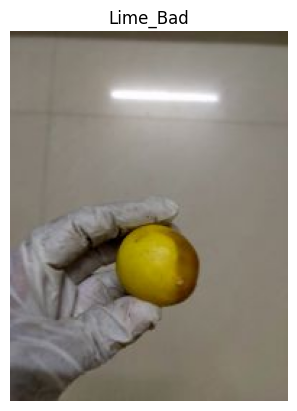

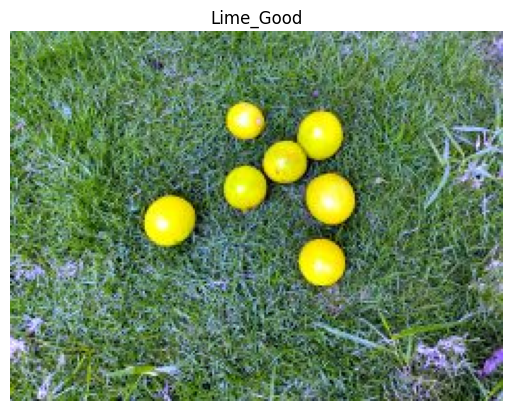

In [ ]:
for i,folder in enumerate(os.listdir("Lime")):
    plt.title(folder)
    plt.axis("off")
    plt.imshow(plt.imread(f"Lime//{folder}//{os.listdir('Lime//'+folder)[i]}"))
    plt.show()

#

## AUGMENTASI <a name="AUGMENTASI">

In [25]:
IMG_PATH = 'Lime'
img_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    height_shift_range=0.2,
    width_shift_range=0.2,
    validation_split= 0.2,
    fill_mode= 'nearest',
)

#

## PREPROCESSING <a name="PREPROCESSING">

In [26]:
dataset_train = img_datagen.flow_from_directory(
    IMG_PATH,
    target_size=(128,128),
    batch_size=32,
    shuffle=True,
    class_mode = 'categorical',
    subset= 'training'
)

dataset_val = img_datagen.flow_from_directory(
    IMG_PATH,
    target_size=(128,128),
    batch_size=32,
    shuffle=True,
    class_mode = 'categorical',
    subset= 'validation'
)

Found 1744 images belonging to 2 classes.
Found 435 images belonging to 2 classes.


#

## VISUALISASI DATA SETELAH PREPROCESSING <a name="VISUALISASI2">

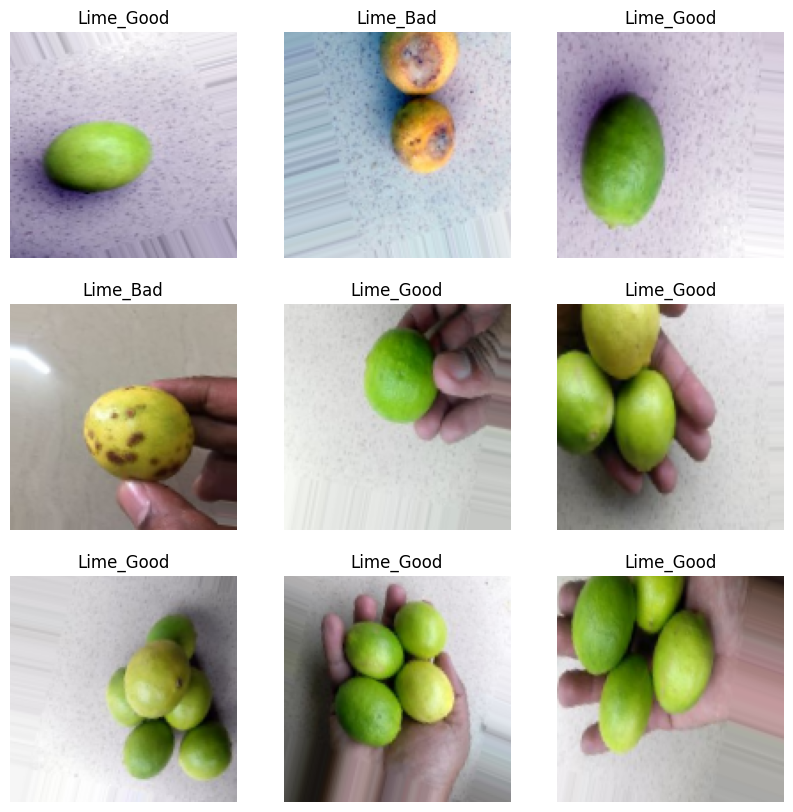

In [27]:
plt.figure(figsize=(10,10))
for i in range(9):
        plt.subplot(3,3, i+1)
        img, label = dataset_train.next()
        plt.imshow(img[0])
        plt.title(class_names[tf.argmax(label[0])])
        plt.axis('off')
plt.show()

#

## DATA MODELLING <a name="MODELLING">

### Callback

In [28]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('accuracy') > 0.90):
            print('\n Akurasi sudah mencapai 99%')
            self.model.stop_training = True
            
callbacks = myCallback()

### Model

In [29]:
# Mendeklarasikan model yang akan dipakai 
model = tf.keras.models.Sequential([
    # disini menggunakan 3 layer modelling 
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', input_shape=[128,128, 3]),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(64, activation='relu'), #hidden layer 64
    tf.keras.layers.Dropout(0.5), #dropout layer
    tf.keras.layers.Dense(32, activation='relu'), #hidden layer 32
    tf.keras.layers.Dropout(0.5), #Droput Layer 
    
    # Layer output 2 karena pakai 2 class dan aktivasinya menggunakan softmax
    Dense(2, activation='softmax')
])

### Menampilkan hasil model

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 512)     14336     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 512)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 256)       1179904   
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 256)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 128)     

### Model Compile

In [31]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Model fit

In [33]:
hasil = model.fit(dataset_train, validation_data = dataset_val, epochs=20, verbose=1, callbacks = [callbacks])

Epoch 1/20
55/55 [==============================] - 458s 8s/step - loss: 0.7317 - accuracy: 0.4977 - val_loss: 0.6896 - val_accuracy: 0.8690
Epoch 2/20
55/55 [==============================] - 344s 6s/step - loss: 0.4520 - accuracy: 0.7982 - val_loss: 0.4795 - val_accuracy: 0.7747
Epoch 3/20
55/55 [==============================] - ETA: 0s - loss: 0.1402 - accuracy: 0.9633
 Akurasi sudah mencapai 99%
55/55 [==============================] - 314s 6s/step - loss: 0.1402 - accuracy: 0.9633 - val_loss: 0.1733 - val_accuracy: 0.9425


#

## MENYIMPAN MODEL <a name="SAVE">

In [63]:
model.save('modellime.h5')
print('Model Tersimpan !')

Model Tersimpan !


#

## EVALUASI <a name="EVALUASI">

In [34]:
model.evaluate(dataset_val)

14/14 [==============================] - 21s 1s/step - loss: 0.1653 - accuracy: 0.9448


[0.16527292132377625, 0.9448275566101074]

#

## VISUALISASI AKURASI DAN LOSS <a name="AKURASI">

### Menggunakan Line Plot

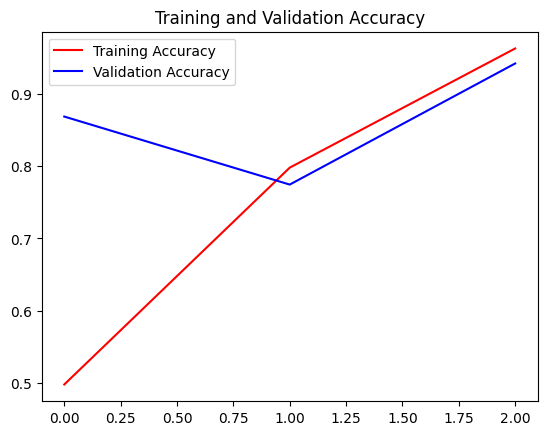

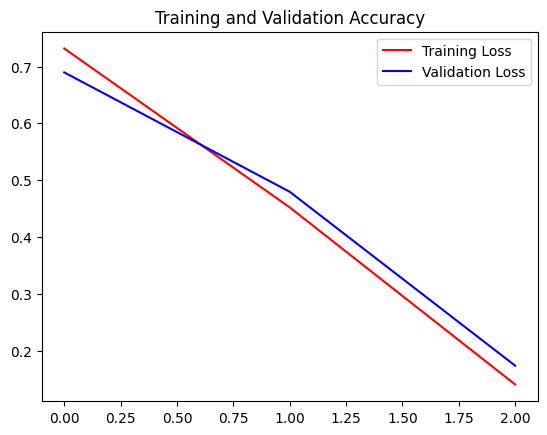

In [35]:
acc = hasil.history['accuracy']
val_acc = hasil.history['val_accuracy']
loss = hasil.history['loss']
val_loss = hasil.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 'best')
plt.show()




#

## LOAD MODEL DAN PREDIKSI <a name="PREDIKSI">

### Load Model

In [64]:
from keras.models import load_model
model = load_model('modellime.h5')
print('Memuat Model !')


Memuat Model !


#

### Prediksi

In [111]:
import numpy as py
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

1/1 [==============================] - 4s 4s/step
Lime_Good


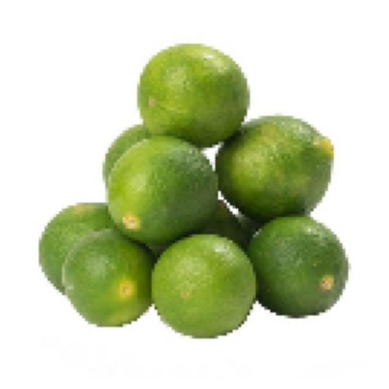

1/1 [==============================] - 0s 61ms/step
Lime_Good


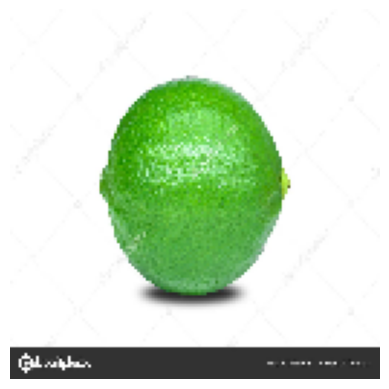

1/1 [==============================] - 0s 61ms/step
Lime_Bad


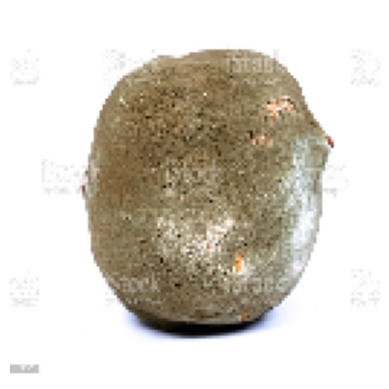

1/1 [==============================] - 0s 65ms/step
Lime_Bad


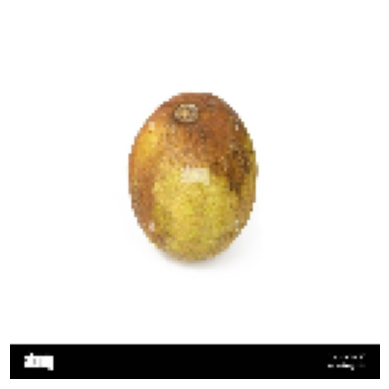

In [114]:
for x in range(1,5):
    test=tf.keras.preprocessing.image.load_img(f"Uploaded//test//{x}.jpeg",
                                              target_size=(128,128),interpolation="nearest")
    plt.imshow(test)
    plt.axis("off")
    test=np.array(test)
    test=np.expand_dims(test,0)
    predict=model.predict(test)
    print(class_names[np.argmax(predict)])
    plt.show()